In [1]:
import urllib.request
import zipfile
import os
import ssl

try:
    os.mkdir("files")
except:
    pass

ssl._create_default_https_context = ssl._create_unverified_context

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

['monday.txt', 'orders_2_2024.csv', 'orders_4_2024.csv', 'dialation_2.png', 'infile1.txt', 'out.txt', 'evil_morty_segmentation.png', 'evil_morty_change_3.png', 'erosion_2.png', 'ex2.csv', 'dog_noised.png', 'dog.png', '__MACOSX', 'ship.png', 'evil_morty_change.png', 'products2.csv', 'countries-of-the-world.csv', 'foods.txt', 'sunday.txt', 'infile2.txt', 'evil_morty_change_noised.png', 'erosion.png', 'evil_morty_1.png', 'StudentsGrades.csv', 'witcher_2.csv', 'ex1.csv', 'witcher_1.csv', 'dialation.png', 'orders_3_2024.csv', 'woman_noised.png', 'baby.png', 'notebook_resources.zip', 'koala.png']


# פעולות בסיסיות על מערכי Numpy ותמונות

ביחידה זו נכיר תכונות ופעולות שונות שניתן לבצע במערכי Numpy, ונדגים אותם על המערכים "רגילים" כמו גם על מערכים המייצגים תמונות.

### מימדי המטריצה

נתחיל מהגדרת המטריצה הבאה:

In [2]:
b = np.array([[3, 4, 5], [6, 7, 8]])
print('b is \n' , b)

NameError: name 'np' is not defined

למדנו ביחידות הקודמות ש`len` תחזיר לנו את אורך האובייקט. מה לדעתם הערך שיוחזר מ`len` עבור המטריצה שלנו? 

In [50]:
print(len(b))

2



כלומר, עבור מערכי Numpy, `len` מחזירה את **מספר השורות** במטריצה.  
במערך חד-מימדי `len` תחזיר את מספר האלמנטים במערך, בדומה לרשימה.

ואם נרצה לקבל את כל מימדי המטריצה שלנו? לצורך כך נשתמש בתכונה `shape`:

In [49]:
print(b.shape)

(2, 3)


ניתן גם **לשחלף** את המטריצה שלנו ע"י שימוש בתכונה `T` (כמו Transpose).   
שימו לך שמימדי המטריצה המשוחלפת התהפכו!

In [48]:
print('b is \n',b)
print('b transposed is \n',b.T)
print('b transposed dimensions are: ',b.T.shape)

b is 
 [[3 4 5]
 [6 7 8]]
b transposed is 
 [[3 6]
 [4 7]
 [5 8]]
b transposed dimensions are:  (3, 2)


מלבד שחלוף, קיימת פונקציה בשם `reshape`, המאפשרת לשנות את מבנה המטריצה. מתודה זה תשים את האיברים של המטריצה המקורית, **לפי סדר השורות**, במטריצה חדשה בעלת מימדים שהועברו בקלט.


In [47]:
c = b.reshape((3,2))
print(c)

[[3 4]
 [5 6]
 [7 8]]


```{admonition} **שימו לב **
:class: warning
המימדים המועברים בקלט המתודה `reshape` חייבים לייצג מטריצה אשר תכיל את כל איברי המערך ממנו הופעלה המתודה. אחרת נקבל שגיאה.

לדוגמאות לעיל, פלט המתודה `reshape` אינו זהה למטריצה המשוחלפת, זאת מכיוון שבמטריצה המשוחלפת השורות הופכות לעמודות, וב-`reshape` סדר האיברים לפני שורות נשמר 
```



כעת נדגים מה כיצד הפעולות שראינו למעלה מתבטאות במטריצות המייצגות תמונות:

על מנת לקבל את מספר השורות והעמודות בתמונה נוכל להשתמש בתכונה `shape`:

In [52]:
print(im_dog.shape)

(302, 335)


ועל מנת להפוך את התמונה על צידה נוכל להשתמש בתכונה `T`

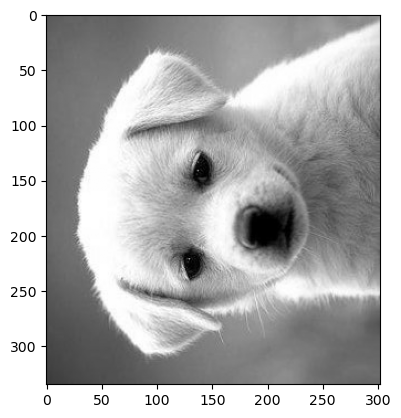

In [53]:
im_transposed = im_dog.T
plt.imshow(im_transposed,cmap='gray')

בדומה לרשימות, גם ב Numpy ניתן לגשת לערכים ספציפיים בתמונה, כולל Slicing. 

הייחודיות של Numpy היא שניתן לגשת לאיבר (או איברים) במטריצה (לדוגמא, `mat`) ע"י אינדקס השורות (`x`) והעמודות (`y`) יחדיו בתוך הסוגריים המרובעים בצורה הבאה: `mat[x,y]` 

נדגים זאת בקוד הבא:

תחילה ניצור מטריצה 3X3 של סדרת המספרים בין 0 ל8:

In [76]:
a=np.arange(9).reshape((3,3))
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


כעת נחלץ את האיבר האמצעי של המטריצה:

In [66]:
print(a[1, 1])

4


כלומר, חילצנו את האיבר שנמצא באינקס 1 של השורות (שורה שניה) ובאינדקס 1 של עמודות (עמודה שניה):

כדי להחזיר שורה שלמה, פשוט לא נעביר אינדקס עמודות. לדוגמא, כך נחזיר את כל השורה השניה:

In [67]:
print(a[1])

[3 4 5]


ומה עם נרצה להחזיר את כל העמודה השניה? חייבים לשים משהו לפני הפסיק...   
במקרה זה, נשים פשוט נקודותיים `:` בדומה לslciing נקודותיים מחזירה את כל הטווח (כלומר, את כל השורות).

לדוגמא, כך נחזיר את העמודה השניה:

In [68]:
print(a[:,1])

[1 4 7]


באופן אנלוגי לרשימות, גם כאן ניתן לבצע השמות של איבורים למטריצה קיימת באמצעות פירוט אינדקסים הרלוונטיים:

In [69]:
a[1, 1] = 10
print(a)

[[ 0  1  2]
 [ 3 10  5]
 [ 6  7  8]]


ניתן גם להחזיר או לבצע הרשמה על תת-קבוצה של שורות/עמודות. לדוגמא:

In [73]:
a[0,0:2] = a[2,1:3]*10
print(a)

[[70 80  2]
 [ 3 10  5]
 [ 6  7  8]]


ניתן אף לפרט בדיוק אילו אינדקסים רוצים להחזיר ובאיזה סדר באמצעות רשימה (או Iterable מספרי אחר) בשורות את בעמודות. לדוגמא:

In [79]:
print(a[[2,1,2], 2])

[8 5 8]


#### תרגול: החזרת תתי-מטריצות באמצעות Slicing

תחילה נגדיר את המטריצה `mat` הבאה:

In [ ]:
mat= np.array([[0, 1, 2,3,4,5],
            [10, 11, 12,13,14,15],
            [20, 21, 22,23,24,25],
            [30, 31, 32,33,34,35],
            [40, 41, 42,43,44,45],
            [50, 51, 52,53,54,55]])
print(mat)

כעת, עבור כל אחת מארבעת הצבעים במטריצה להלן, כתוב **שורה בודדת** המבצעת Slicing על `mat` כדי לקבל את תת-מטריצה המסומנת ע"י אותו הצבע:  

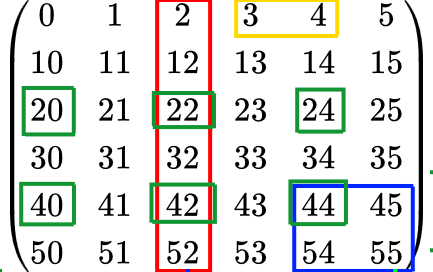

#### <span style='color:orange'> חיתוך שורות </span>

In [ ]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[0,3:5])
```

#### <span style='color:red'> חיתוך עמודות </span>

In [ ]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[:,2])
```

#### <span style='color:blue'>תת מטריצה רציפה </span>

In [ ]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[4:,4:])
```


#### <span style='color:green'> תת-מטריצה עם קפיצות </span>

In [ ]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[2::2,::2])
```

נדגים כעת כיצד ניתן לעבד תמונה באמצעות Slicing.   
ודאו שהבנתם כיצד כל פעולה יצרה כל אחת מהתמונות שהודפסו למסך.

In [83]:
new_fig = np.zeros((100,100))
new_fig[::2,::2] = 255

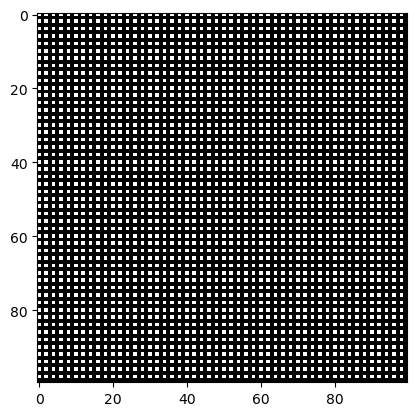

In [85]:
plt.imshow(new_fig, cmap=plt.cm.gray)

In [86]:
im2=im_dog[::10,::10]

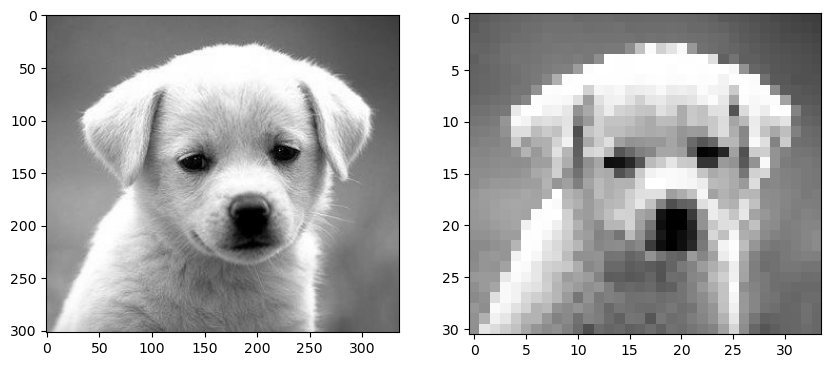

In [87]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(im2, cmap=plt.cm.gray)

### ערכים בוליאניים והשוואות במערכי Numpy

בדוהמ לאופרטורים אריתמטיים, גם פעולות השוואה במערכי Numpy נעשית איבר-איבר אם משווים בין 2 מערכים, או אל מול ערך ספציפי. 

לדוגמא:

In [94]:
a = np.arange(5)
print("a: ", a)
b = np.arange(4,-1,-1)
print("b: ", b)
print(a<2)
print(a==b)

a:  [0 1 2 3 4]
b:  [4 3 2 1 0]
[ True  True False False False]
[False False  True False False]


ניתן להשתמש ב`any` על מנת לבדוק האם **לפחות אחד** מהערכים במערך הוא `True`, כמו **פעולת `or`** בין כל איברי המערך.   
באופן אנלוגי, ניתן גם להשתמש ב`all` על מנת לבדוק האם **כל** הערכים במערך הוא `True`, כמו **פעולת `and`** בין כל איברי המערך. 

In [98]:
comp1=a==b
print("### a==b ###")
print("any: ", comp1.any())
print("all: ",comp1.all())

print("### a<6 ###")
comp2=a<6
print("any: ",comp2.any())
print("all: ",comp2.all())

print("### a>6 ###")
comp3=a>6
print("any: ",comp3.any())
print("all: ",comp3.all())

### a==b ###
any:  True
all:  False
### a<6 ###
any:  True
all:  True
### a>6 ###
any:  False
all:  False


כפי שלמדנו ניתן להתייחס לערכים הבוליאניים `False` ו-`True` גם כ-0 ו-1 בהתאמה. 

לכן, ניתן להפעיל עליהם גם מתודות ארימתטיות כמו `nonzero` המוצאת את כל האינדקסים המערך בהם מופיע ערך שאינו 0' ובמקרה של מטריצה בוליאנית, כל מקום בו מופיע `True` 

In [99]:
print("### a==b ###")
print(comp1.nonzero())

(array([2]),)


דוגמא נוספת היא המתודה `sum` הסוכמת את כל איבורי המטריצה

In [100]:
print("### a==b ###")
print(comp1.sum())

### a==b ###
1


```{admonition} **חשבו**
:class: info

מדוע החזירו המתודות `nonzero` ו-`sum` את הערכים שהודפסו לעיל עבור a==b? 

```
